In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,time

In [3]:
plastic=pd.read_csv("A:/Data Science/assignments/Forecasting/PlasticSales.csv",parse_dates=)

In [4]:
plastic.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


In [29]:
plastic.dtypes

Sales      int64
Months    object
Year      object
Date      object
dtype: object

In [8]:
plastic.index=pd.to_datetime(plastic.Month)

In [ ]:
plastic.drop(plastic.columns[0],axis=1,inplace=True)

In [21]:
plastic.head()

,Sales
Month,
2049-01-01,742
2049-02-01,697
2049-03-01,776
2049-04-01,898
2049-05-01,1030


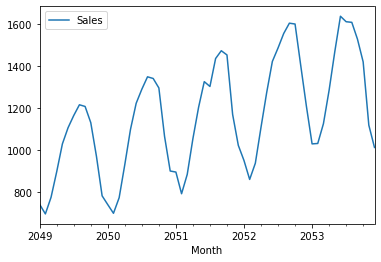

In [22]:
plastic.plot()

In [ ]:
#There is Seasonality and trend in the above plot.
#The plot does not look stationary applying differnce to see if it becomes stationary

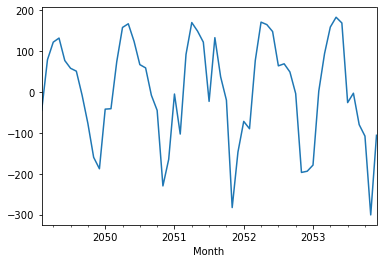

In [233]:
Sales_diff=plastic.Sales.diff(periods=1)
salesdiff=Sales_diff.dropna()
salesdiff.plot()

In [26]:
plastic['Months']=plastic.index.strftime('%B')
plastic['Year']=plastic.index.strftime('%Y')
plastic['Date']=plastic.index.strftime('%d')

In [27]:
plastic.head()

,Sales,Months,Year,Date
Month,,,,
2049-01-01,742,January,2049,01
2049-02-01,697,February,2049,01
2049-03-01,776,March,2049,01
2049-04-01,898,April,2049,01
2049-05-01,1030,May,2049,01


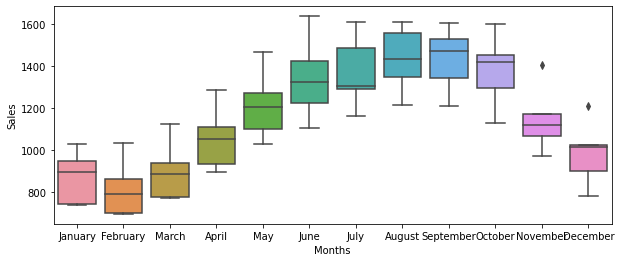

In [43]:
plt.figure(figsize=(10,4))
import seaborn as sns
sns.boxplot(plastic.Months,plastic.Sales)

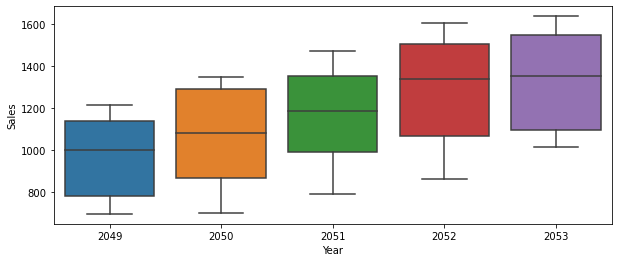

In [44]:
plt.figure(figsize=(10,4))
import seaborn as sns
sns.boxplot(plastic.Year,plastic.Sales)

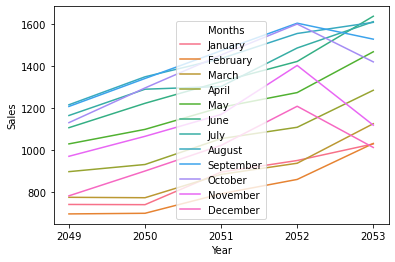

In [47]:
sns.lineplot(plastic.Year,plastic.Sales,hue=plastic.Months)

In [35]:
pd.pivot_table(data=plastic,columns='Months',index='Year',values='Sales',aggfunc=np.mean)

Months,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2049,898,1216,783,697,742,1165,1107,776,1030,971,1131,1208
2050,932,1349,901,700,741,1290,1223,774,1099,1066,1296,1341
2051,1055,1436,1023,793,896,1303,1326,885,1204,1170,1453,1473
2052,1109,1555,1209,861,951,1486,1422,938,1274,1403,1600,1604
2053,1285,1608,1013,1032,1030,1611,1637,1126,1468,1119,1420,1528


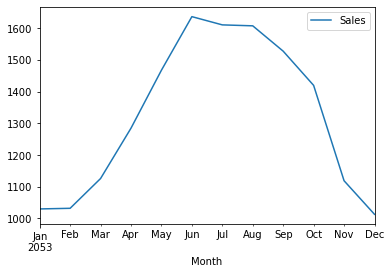

In [42]:
Last_year=plastic.iloc[-12:]
Last_year.plot()

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

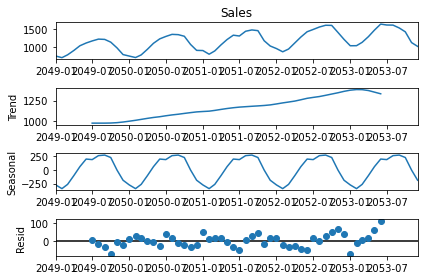

In [50]:
plastics_additive=seasonal_decompose(plastic.Sales,model='additive')
z=plastics_additive.plot()

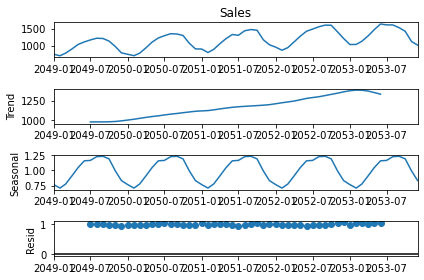

In [51]:
plastics_additive=seasonal_decompose(plastic.Sales,model='mutiplicative')
z=plastics_additive.plot()

In [60]:
plastic.shape

(60, 4)

In [78]:
plastic.head()

,Sales,Months,Year,Date
Month,,,,
2049-01-01,742,January,2049,01
2049-02-01,697,February,2049,01
2049-03-01,776,March,2049,01
2049-04-01,898,April,2049,01
2049-05-01,1030,May,2049,01


In [83]:
plastic.columns

Index(['Sales', 'Months', 'Year', 'Date'], dtype='object')

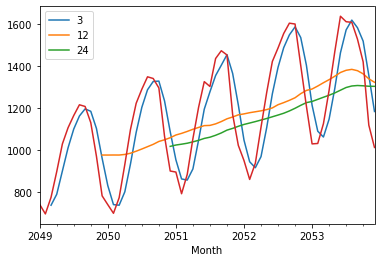

In [58]:
#Moving Average
list=[3,12,24]
for i in list:
    plastic.Sales.rolling(i).mean().plot(label=str(i))
    plt.legend()
plastic.Sales.plot()

In [109]:
train=plastic.iloc[0:50]
test=plastic.iloc[50:61]

In [284]:
#train.drop(['Year','Date'],axis=1,inplace=True)
#test.drop(['Months','Year','Date'],axis=1,inplace=True)

In [119]:
test.head()

,Sales
Month,
2053-03-01,1126
2053-04-01,1285
2053-05-01,1468
2053-06-01,1637
2053-07-01,1611


In [123]:
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [285]:
import warnings
warnings.filterwarnings('ignore')
#Simple Exponential method
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
SimpleExpmodel=SimpleExpSmoothing(train.Sales).fit()
predictSimExp=pd.Series(SimpleExpmodel.predict(start=test.index[0],end=test.index[-1]))
RMSE1=np.sqrt(np.mean(test.Sales-predictSimExp)**2)
RMSE1

349.5

In [144]:
predictSimExp.columns

['Sales']

In [146]:
predictSimExp.columns=['Sales']

In [149]:
predictSimExp=pd.DataFrame(predictSimExp)

In [153]:
#predictSimExp.rename(columns={0:'Sales'},inplace=True)
predictSimExp

,Sales
2053-03-01,1032.0
2053-04-01,1032.0
2053-05-01,1032.0
2053-06-01,1032.0
2053-07-01,1032.0
2053-08-01,1032.0
2053-09-01,1032.0
2053-10-01,1032.0
2053-11-01,1032.0
2053-12-01,1032.0


In [154]:

y=test.append(predictSimExp)

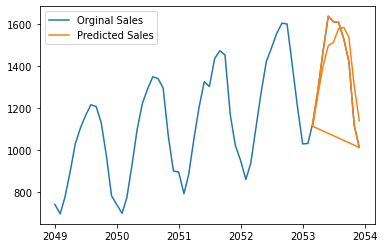

In [288]:
plt.plot(plastic.Sales,label='Orginal Sales')
plt.plot(y.Sales,label='Predicted Sales')
plt.legend()

In [196]:
#Holt method
from statsmodels.tsa.holtwinters import Holt
modelH1=Holt(train.Sales).fit()
predict_H=modelH1.predict(start=test.index[0],end=test.index[-1])
RMSE2=np.sqrt(np.mean(test.Sales-predict_H)**2)
RMSE2

338.7089339960973

In [187]:
predict_H.rename({0:'Sales'},axis=1,inplace=True)

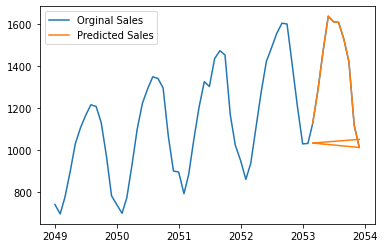

In [190]:
#predict_H=pd.DataFrame(predict_H)
y=test.append(predict_H)
plt.plot(plastic.Sales,label='Orginal Sales')
plt.plot(y.Sales,label='Predicted Sales')
plt.legend()

In [289]:
#Holt winters with additive trend and additive Seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model1=ExponentialSmoothing(train.Sales,trend='add',seasonal='add',seasonal_periods=12,damped=True).fit()
predict2=model1.predict(start=test.index[0],end=test.index[-1])
RMSE3=np.sqrt(np.mean(test.Sales-predict2)**2)
RMSE3

11.250091034003413

In [290]:
predict2=pd.DataFrame(predict2)
predict2.rename({0:'Sales'},axis=1,inplace=True)
predict2

,Sales
2053-03-01,1113.792249
2053-04-01,1263.269323
2053-05-01,1397.926617
2053-06-01,1497.180194
2053-07-01,1512.406265
2053-08-01,1577.979047
2053-09-01,1583.776254
2053-10-01,1536.009066
2053-11-01,1305.721493
2053-12-01,1139.440402


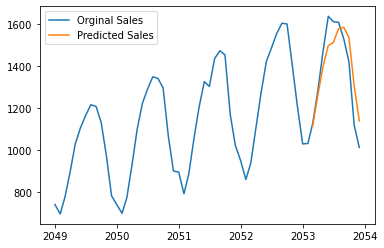

In [291]:

plt.plot(plastic.Sales,label='Orginal Sales')
plt.plot(predict2.Sales,label='Predicted Sales')
plt.legend()

In [217]:
#Holt winters with additive trend and Multiplicative Seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model2=ExponentialSmoothing(train.Sales,trend='add',seasonal='mul',seasonal_periods=12,damped=True).fit()
predict3=model2.predict(start=test.index[0],end=test.index[-1])
RMSE4=np.sqrt(np.mean(test.Sales-predict3)**2)
RMSE4

176.424813549394

In [219]:
predict3=pd.DataFrame(predict3)
predict3.rename({0:'Sales'},axis=1,inplace=True)
#predict3

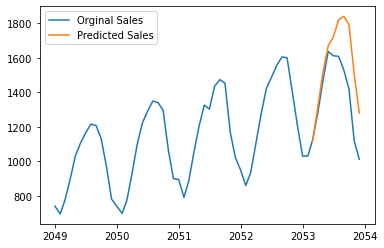

In [220]:
plt.plot(plastic.Sales,label='Orginal Sales')
plt.plot(predict3.Sales,label='Predicted Sales')
plt.legend()

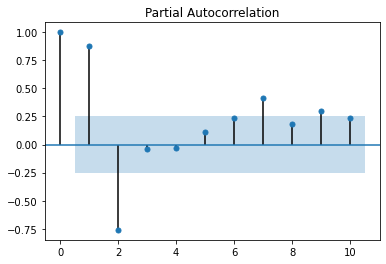

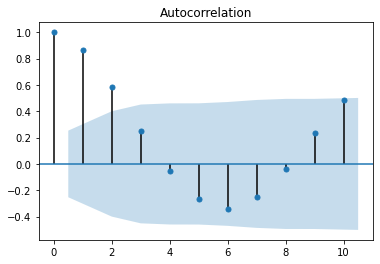

In [250]:
#plot p,q from PACF and ACF plots

import statsmodels.graphics.tsaplots as tsaplots
PACF=tsaplots.plot_pacf(plastic.Sales,lags=10)# p value is 1
ACF=tsaplots.plot_acf(plastic.Sales,lags=10)# q value is 1

In [223]:
#ARMA model
from statsmodels.tsa.ar_model import AR
model3=AR(train.Sales).fit()
predict4=model3.predict(start=test.index[0],end=test.index[-1])
RMSE5=np.sqrt(np.mean(test.Sales-predict4)**2)
RMSE5

98.81950164504072

In [224]:
predict4=pd.DataFrame(predict4)
predict4.rename({0:'Sales'},axis=1,inplace=True)

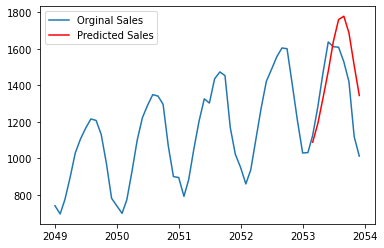

In [237]:
plt.plot(plastic.Sales,label='Orginal Sales')
plt.plot(predict4.Sales,label='Predicted Sales',color='red')
plt.legend()

In [258]:
#ARIMA model
import statsmodels.api as sm
model_sm=sm.tsa.statespace.SARIMAX(train.Sales,order=(1,1,0)).fit()
predictm=model_sm.predict(start=test.index[0],end=test.index[-1],dynamic=True)
RMSE6=np.sqrt(np.mean(test.Sales-predictm)**2)
RMSE6

346.45099889220944

In [256]:
predictm=pd.DataFrame(predictm)
predictm.rename({0:'Sales'},axis=1,inplace=True)

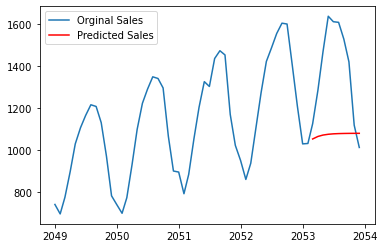

In [257]:
plt.plot(plastic.Sales,label='Orginal Sales')
plt.plot(predictm.Sales,label='Predicted Sales',color='red')
plt.legend()

In [280]:
#SARIMAX
import statsmodels.api as sm
model_sma=sm.tsa.statespace.SARIMAX(train.Sales,order=(2,1,2),seasonal_order=(2,1,1,12)).fit()
predictma=model_sma.predict(start=test.index[0],end=test.index[-1],dynamic=True)
RMSE7=np.sqrt(np.mean(test.Sales-predictma)**2)
RMSE7

95.53337196821204

In [281]:
predictma=pd.DataFrame(predictma)
predictma.rename({0:'Sales'},axis=1,inplace=True)

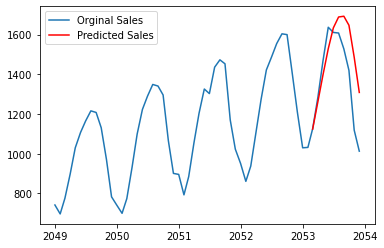

In [282]:
plt.plot(plastic.Sales,label='Orginal Sales')
plt.plot(predictma.Sales,label='Predicted Sales',color='red')
plt.legend()

In [ ]:
#Holt winters with additive trend and additive seasonality is the best model for forecasting
#The RMSE value is 11
#Below is the best model plot

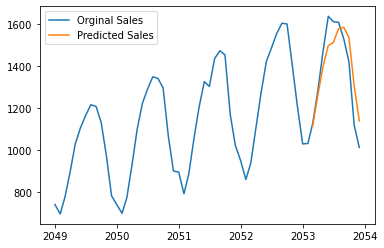

In [292]:
plt.plot(plastic.Sales,label='Orginal Sales')
plt.plot(predict2.Sales,label='Predicted Sales')
plt.legend()